# Dividir el dataset en conjunto de entrenamiento y de testing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [4]:
a = np.random.randn(len(data))

(array([ 4.,  9., 20., 26., 36., 51., 27., 19.,  6.,  2.]),
 array([-2.73897754, -2.19590058, -1.65282362, -1.10974666, -0.5666697 ,
        -0.02359273,  0.51948423,  1.06256119,  1.60563815,  2.14871511,
         2.69179207]),
 <a list of 10 Patch objects>)

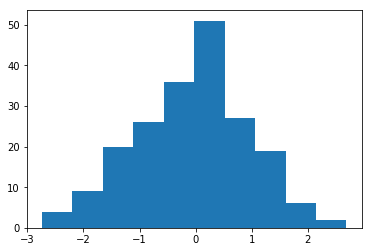

In [5]:
plt.hist(a)

In [9]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [10]:
len(training), len(testing)

(163, 37)

In [12]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     681.8
Date:                Mon, 02 Apr 2018   Prob (F-statistic):           5.03e-79
Time:                        22:24:09   Log-Likelihood:                -315.14
No. Observations:                 163   AIC:                             636.3
Df Residuals:                     160   BIC:                             645.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9336      0.329      8.905      0.000       2.283       3.584
TV             0.0465      0.002     30.530      0.000       0.043       0.049
Radio          0.1807      0.009     19.483      0.000       0.162       0.199
==============================================================================
Omnibus:                       54.879   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.270
Skew:                          -1.413   Prob(JB):                     5.73e-31
Kurtosis:                       6.538   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9336 + 0.0465 * TV + 0.1807 * Radio

## Validación del modelo con el conjunto de testing

In [14]:
sales_pred = lm.predict(testing)
sales_pred

9      12.689881
18      9.854104
25     15.785321
26     14.869678
29      9.106066
43     14.067888
48     16.348522
53     19.768565
55     21.104381
58     21.693618
60      5.781606
64     16.760553
65      7.821071
67     12.028130
69     20.942554
72     10.142035
74     17.297193
75     11.615286
79      9.716474
81     14.820073
86     11.448940
91      4.533936
98     24.041760
101    23.269023
105    17.727097
107     7.189502
109    19.664895
111    21.033802
122    13.778532
125     9.118714
141    18.333020
148    11.981642
160    14.221716
167    13.485030
181    14.064971
185    20.610932
186     9.796859
dtype: float64

In [15]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

104.31191120382178

In [16]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.7515699781475187

In [18]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.11854415436520611

In [ ]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

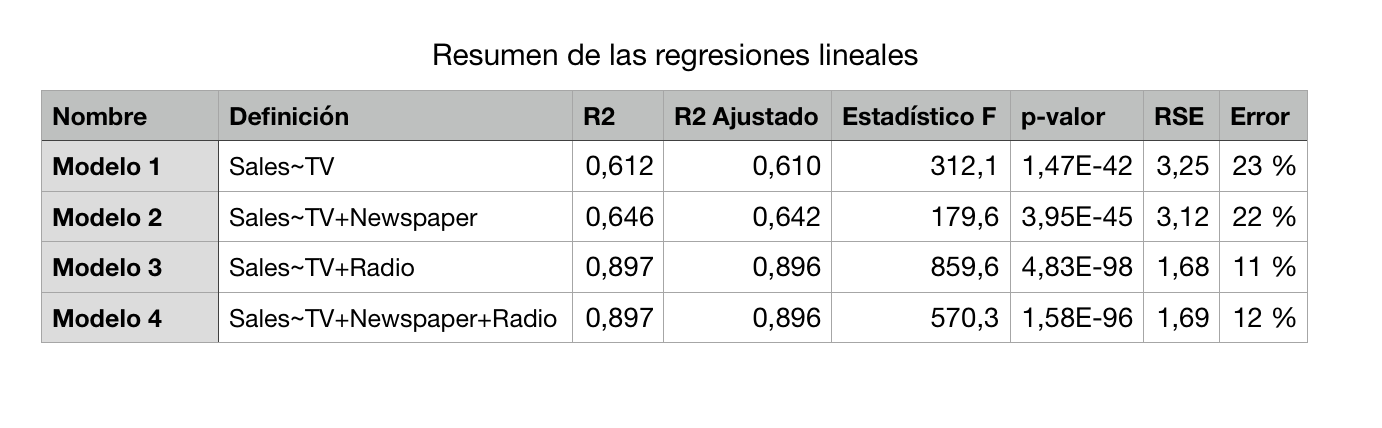

In [19]:
from IPython.display import Image
Image(filename="resources/summary-lm.png")